MODELLO GENERALE

In [30]:
import random as rd
import numpy as np
import matplotlib.pyplot as plot


Nel main richiamo le funzioni che servono per simulare l'estrazione e la scelta del giocatore singolo.
Le funzioni che servono:
-generare colore urna (universo)
-generare numero giocatori
-creare un vettore che contiene le palline in numero giusto in base allo stato dell'universo
-estrarre una pallina dal vettore in modo casuale
-calcolare la probabilità bayesiana
-decidere se accettare o meno l'opzione


lambda della distribuzione  2.8124365997159666
tasso di cascate corrette  0.7455


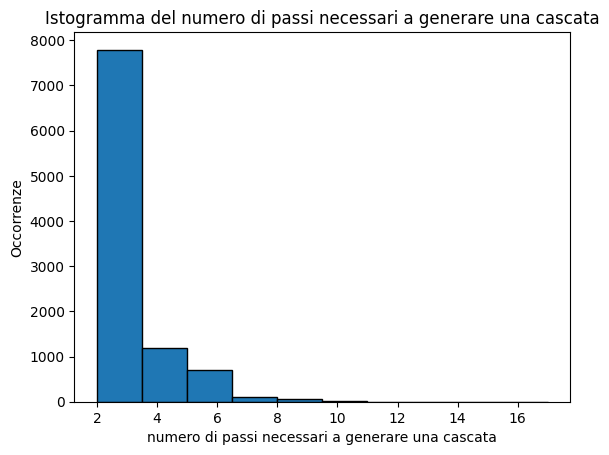

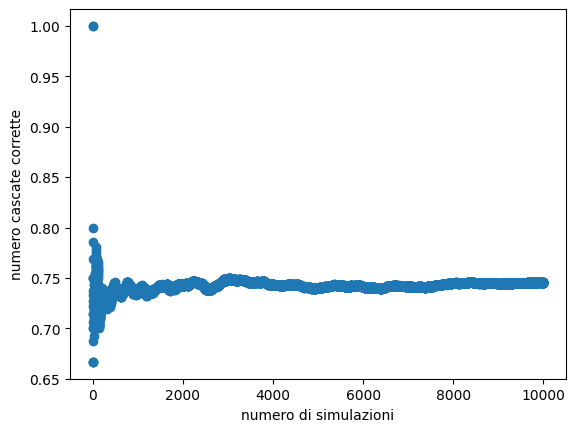

In [82]:
priorblue = 0.5
priorred = 0.5
blue = 0
red = 1
#q è la prob che dato lo stato good si abbia un high signal e dato lo stato bad si abbia un low signal (prob che la pallina sia rossa se l'urna è a maggioranza rossa e blu se è a maggioranza blu)
q = 2/3
    
#definisce in modo casuale lo stato dell'universo (maggioranza rossa, maggioranza blu)
def universe():
    state = rd.randint(0,1)
    return state

#definisce il numero di partecipanti all'esperimento
def partecipants():
    num = rd.randint(3,30)
    return num

#riempie un vettore con la corretta proporzione di palline a seconda dello stato dell'universo
def vector_world(state):
    alternative = [0,1]
    if state == 1:
        world = [1,1,0]
    else:
        world = [0,0,1]
    return world

#effettua l'estrazione della pallina dall'urna
def extraction(world):
    signal = rd.choice(world)
    return signal

#calcola la probabilità che data una serie di segnali, l'urna sia a maggioranza rossa o blu
def bayes(p, a , b , q):
    denom = ( p * (q**a) * ((1-q)**b) + (1-p) * ((1-q)**a) * (q**b) )
    if denom == 0:
        denom = np.nextafter(0, 1)
    post = ( p * (q**a) * ((1-q)**b) )/ denom
    return post

#effettua la scelta in base alle posterior
def make_decision(postblue, postred, signal):
    if postblue > postred:
        choice = 0
    elif postblue < postred:
        choice = 1 
    else:
        choice = signal
    return choice

#verifica se due giocatori compiono consecutivamente la stessa scelta dando quindi origine ad una cascata
def consecutive_elements(vector,i):
    if len(vector) == 1:    
        return None
    else:
        if vector[i] == vector[i - 1]:
            return True
        return False


#dinamica per un partecipante
def singlepartecipant(a, b, q, state, world, correct_signal, count_coherent, count_inchoerent):
    
    signal = extraction(world)

    if signal == state:
        correct_signal += 1

    if signal == 1:
        a += 1
    else:
        b += 1
    
    postred = bayes(priorred, a, b, q)
    postblue = 1 - postred
   

    choice = make_decision(postblue, postred, signal)

    if signal == choice:

        count_coherent += 1

        return a, b, choice, count_coherent, count_inchoerent, correct_signal, postblue, postred, signal

    else:

        if signal == 1: 
            a -= 1
            b += 1
        else:
            a += 1
            b -= 1
        count_inchoerent += 1

        
        return a, b, choice, count_coherent, count_inchoerent, correct_signal, postblue, postred, signal



#vettore che raccoglie il numero di volte in cui la scelta = segnale ad ogni esperimento
vector_coherent = []

#vettore che raccoglie il numero di volte in cui la scelta è diversa dal segnale ad ogni esperimento
vector_incoherent = []

#vettore che raccoglie il numero di volte che la cascata porta alla soluzione corretta
correct_guesses = []

#vettore che raccoglie il numero di partecipanti per ogni simulazione
vector_participants = []

#vettore che raccoglie in ogni simulazione il numero di passi necessari a dare avvio ad una cascata
counter = []

#vettore che raccoglie l'indice di ogni simulazione
vector_sim = []

#contatore per numero di volte in cui la cascata porta ad un risultato corretto
num_correct_cascade = 0

num_sim = 10000

#faccio num_sim simulazioni
for j in range(0,num_sim):

    #estraggo casualmente il numero di partecipanti dell'esperimento
    numpart = partecipants()

    '''#estraggo il partecipante da cui in poi si interrompe la cascata
    random_part = rd.randint(1, numpart)'''

    #vettore con i numeri da 0 a numpart
    vector_part = []

    #vettore che raccoglie i segnali
    signal_vect = []

    #vettore che raccoglie il numero di partecipanti ad ogni simulazione
    vector_participants.append(numpart)

    #creo lo stato dell'universo
    state = universe()

    #creo il vettore che contiene la giusta proporzione di palline
    world = vector_world(state)

    #calcolo la probabilità di estrarre una pallina rossa condizionata allo stato dell'universo
    q = 2/3
    
    #inizializzo contatore segnale rosso
    a = 0

    #inizializzo contatore segnale blu
    b = 0

    #vettore delle scelte
    choice = []

    #numero di volte in cui viene fatta la scelta corretta
    num_correct_guesses = 0

    #numero di volte in cui il segnale è corretto
    correct_signal = 0

    #numero di volte in cui il segnale e la scelta corrispondono
    count_coherent = 0

    #numero di volte in cui il segnale e la scelta non corrispondono
    count_incoherent = 0

    #parametro di controllo per la cascata
    control = True
    
    #eseguo la funzione su ogni partecipante all'esperimento
    for i in range(0, numpart):
                 
        a, b, single_choice, count_coherent, count_incoherent, correct_signal, postblue, postred, signal = singlepartecipant(a, b, q, state, world, correct_signal, count_coherent, count_incoherent)
        
        vector_part.append(i)
        choice.append(single_choice)
        signal_vect.append(signal)
            
        '''print("stato del mondo:", state, "signale ricevuto:", signal, "scelta compiuta:", single_choice)
        print("numero di segnali scelta 1:",a,"numero di segnali scelta 0:",b)
        print("post0:", postblue, "post1:", postred)'''
        
        #verifico che non si sia ancora verificata la cascata
        if control == True:
            #verifico se due partecipanti consecutivi abbiano fatto la stessa scelta
            if consecutive_elements(choice,i) == True:
                control = False 
                #aggiungo al vettore il numero di passi che ci sono voluti per avviare la cascata
                counter.append(i+1)
                #verifico se la cascata è corretta
                if ((choice[i] == 0 and state == 0) or (choice[i] == 1 and state == 1)):
                    num_correct_cascade += 1
                '''print("Cascata di informazione verificata")'''
    
    #vettore che contiene il rate di correttezza della cascata dopo (j+1) simulazioni
    correct_guesses.append(num_correct_cascade/(j+1))
    #vettore che contiene il numero della simulazione
    vector_sim.append(j+1)
    
    '''correct_guesses_rate.append(num_correct_guesses / numpart)
    vector_coherent.append(count_coherent)
    vector_incoherent.append(count_incoherent)'''

    '''plot.scatter(vector_part, signal_vect)
    plot.xlabel('part')
    plot.ylabel('signal')
    plot.show()

    plot.scatter(vector_part, choice)
    plot.xlabel('part')
    plot.ylabel('choice')
    plot.show()'''

#calcolo media
Lambda = np.mean(counter) 
print("lambda della distribuzione ",Lambda)   

correct_cascade_rate = num_correct_cascade/num_sim
print("tasso di cascate corrette ",correct_cascade_rate)

# Crea l'istogramma 
plot.hist(counter, bins=10, edgecolor='black')

# Aggiungi un titolo e etichette per l'asse x e y
plot.title("Istogramma del numero di passi necessari a generare una cascata")
plot.xlabel("numero di passi necessari a generare una cascata")
plot.ylabel("Occorrenze")

# Mostra il grafico
plot.show()

plot.scatter(vector_sim, correct_guesses)
plot.xlabel('numero di simulazioni')
plot.ylabel('numero cascate corrette')
plot.show()


Per la statistica:

- tasso di scelta corretta
- tasso di coerenza
- confronto scelte corrette con segnale corretto e scelte sbagliate con segnale corretto
- grafico acc-reg

In [ ]:
'''#tasso di scelta corretta alla fine delle simulazioni
correct_guesses = sum(correct_guesses_rate)
total_guesses = len(correct_guesses_rate)
correct_guess_rate = correct_guesses / total_guesses
print("Tasso di scelta corretta: ", correct_guess_rate)

#tasso di coerenza alla fine delle simulazioni
total_coherent = sum(vector_coherent)
total_incoherent = sum(vector_incoherent)
total_guesses = total_coherent + total_incoherent
coherence_rate = total_coherent / total_guesses
print("Tasso di coerenza: ", coherence_rate)

#tasso di incoerenza alla fine delle simulazioni
total_coherent = sum(vector_coherent)
total_incoherent = sum(vector_incoherent)
total_guesses = total_coherent + total_incoherent
incoherence_rate = total_incoherent / total_guesses

#controllo faccia 1
print(incoherence_rate+coherence_rate)

#plot che forse non serve a nulla anche se ha un andamento strano, da studiare
plot.scatter(vector_participants, correct_guesses_rate)
plot.xlabel('Numero di partecipanti')
plot.ylabel('Percentuale di scelte corrette')
plot.show()


#plot coerenza in funzione del numero di partecipanti
plot.scatter(vector_participants, vector_coherent)
plot.xlabel('Numero di partecipanti')
plot.ylabel('Coerenza')
plot.show()

#plot incoerenza in funzione del numero di partecipanti, andamento da capire
plot.scatter(vector_participants, vector_incoherent)
plot.xlabel('Numero di partecipanti')
plot.ylabel('Incoerenza')
plot.show()'''


